In this notebook I will test the effect of parenthood (x) on the publication productivity (y) of
researchers at different career stages in Europe?

Stratification:

with parenthood  
without parenthood

No. of Publications = Productivity

In [453]:
import pandas as pd

df = pd.read_excel('../data/H1_analysis/H1_data_NumChildren.xlsx', skiprows=[0])
display(df)


,AcademicPosition,Response ID,NumPublications,NumChildren,ParentalLeave1,ParentalLeave2,ParentalLeave3,ParentalLeave4,ParentalLeave5,ParentalLeave6,ParentalLeave7,ParentalLeave8,ParentalLeave9,ParentalLeave10,ChildBornCountry1,GenderIdentity
0,I am a postdoc,R_2V4kjf4gOQNH6EL,15.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woman
1,I am a postdoc,R_2Mm7mAXANKJetCY,19.0,2,"No, I did not take the leave","Yes, and I spent up to 1/3 of that time on wor...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,Woman
2,"I am tenured (please, indicate the year you re...",R_51QYRBe22NQZDxL,1900.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,Woman
3,"I am tenured (please, indicate the year you re...",R_8EWJNcxqDcHKUzb,0.0,2,"No, I did not take the leave","No, I did not take the leave",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,Man
4,"I am tenured (please, indicate the year you re...",R_2fqgAOx1KsWT4nt,300.0,2,"Yes, and I spent up to 1/3 of that time on wor...","Yes, and I spent up to 1/3 of that time on wor...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,I am a non-tenure-track faculty,R_83OxM8DxlMmRnIl,14.0,4,"No, I did not take the leave","No, I did not take the leave","Yes, and I spent up to 1/3 of that time on wor...","Yes, and I spent up to 1/3 of that time on wor...",NaN,NaN,NaN,NaN,NaN,NaN,Germany,Man
1302,I am a postdoc,R_2pKD21d4JII2EKF,5.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romania,Woman
1303,"I am tenured (please, indicate the year you re...",R_83lrPFMg7s39zwt,5.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,Woman
1304,I am a postdoc,R_8hHbS6L2AP8dHBw,15.0,1,"Yes, and I spent at least 2/3 of that time on ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,Woman


Now, we only consider the first child.

In [454]:
# Remove unnecessary columns
df = df.drop(columns=['ParentalLeave2', 'ParentalLeave3', 'ParentalLeave4', 'ParentalLeave5', 'ParentalLeave6', 'ParentalLeave7', 'ParentalLeave8', 'ParentalLeave9', 'ParentalLeave10'])
df

,AcademicPosition,Response ID,NumPublications,NumChildren,ParentalLeave1,ChildBornCountry1,GenderIdentity
0,I am a postdoc,R_2V4kjf4gOQNH6EL,15.0,0,NaN,NaN,Woman
1,I am a postdoc,R_2Mm7mAXANKJetCY,19.0,2,"No, I did not take the leave",Germany,Woman
2,"I am tenured (please, indicate the year you re...",R_51QYRBe22NQZDxL,1900.0,2,NaN,Germany,Woman
3,"I am tenured (please, indicate the year you re...",R_8EWJNcxqDcHKUzb,0.0,2,"No, I did not take the leave",Germany,Man
4,"I am tenured (please, indicate the year you re...",R_2fqgAOx1KsWT4nt,300.0,2,"Yes, and I spent up to 1/3 of that time on wor...",Netherlands,Man
...,...,...,...,...,...,...,...
1301,I am a non-tenure-track faculty,R_83OxM8DxlMmRnIl,14.0,4,"No, I did not take the leave",Germany,Man
1302,I am a postdoc,R_2pKD21d4JII2EKF,5.0,2,NaN,Romania,Woman
1303,"I am tenured (please, indicate the year you re...",R_83lrPFMg7s39zwt,5.0,3,NaN,France,Woman
1304,I am a postdoc,R_8hHbS6L2AP8dHBw,15.0,1,"Yes, and I spent at least 2/3 of that time on ...",Germany,Woman


Drop rows where necessary data is nan

In [455]:
df = df.dropna(subset=['NumPublications'])
df

,AcademicPosition,Response ID,NumPublications,NumChildren,ParentalLeave1,ChildBornCountry1,GenderIdentity
0,I am a postdoc,R_2V4kjf4gOQNH6EL,15.0,0,NaN,NaN,Woman
1,I am a postdoc,R_2Mm7mAXANKJetCY,19.0,2,"No, I did not take the leave",Germany,Woman
2,"I am tenured (please, indicate the year you re...",R_51QYRBe22NQZDxL,1900.0,2,NaN,Germany,Woman
3,"I am tenured (please, indicate the year you re...",R_8EWJNcxqDcHKUzb,0.0,2,"No, I did not take the leave",Germany,Man
4,"I am tenured (please, indicate the year you re...",R_2fqgAOx1KsWT4nt,300.0,2,"Yes, and I spent up to 1/3 of that time on wor...",Netherlands,Man
...,...,...,...,...,...,...,...
1301,I am a non-tenure-track faculty,R_83OxM8DxlMmRnIl,14.0,4,"No, I did not take the leave",Germany,Man
1302,I am a postdoc,R_2pKD21d4JII2EKF,5.0,2,NaN,Romania,Woman
1303,"I am tenured (please, indicate the year you re...",R_83lrPFMg7s39zwt,5.0,3,NaN,France,Woman
1304,I am a postdoc,R_8hHbS6L2AP8dHBw,15.0,1,"Yes, and I spent at least 2/3 of that time on ...",Germany,Woman


Now, remove cases where the first child was born outside europe

In [456]:
# Remove rows where the 'ChildBornCountry1' is not in Europe or is not NaN

european_countries = [
    "Albania",
    "Andorra",
    "Austria",
    "Belgium",
    "Bosnia and Herzegovina",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",
    "Ireland",
    "Italy",
    "Latvia",
    "Liechtenstein",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Moldova",
    "Monaco",
    "Netherlands",
    "Macedonia",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "San Marino",
    "Serbia and Montenegro",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden",
    "Switzerland",
    "United Kingdom",
    "Vatican City (Holy See)"
]

df_europe = df[df['ChildBornCountry1'].isin(european_countries) | df['ChildBornCountry1'].isna()]
non_europe_df = df[df['ChildBornCountry1'].notna() & ~df['ChildBornCountry1'].isin(european_countries)]



In [457]:
non_europe_df.head()
len(non_europe_df)

54

In [458]:
df_europe
len(df_europe)

1252

In [459]:
df_without_responseid = df_europe.drop(columns=['Response ID'])
df = df_without_responseid
display(df)

,AcademicPosition,NumPublications,NumChildren,ParentalLeave1,ChildBornCountry1,GenderIdentity
0,I am a postdoc,15.0,0,NaN,NaN,Woman
1,I am a postdoc,19.0,2,"No, I did not take the leave",Germany,Woman
2,"I am tenured (please, indicate the year you re...",1900.0,2,NaN,Germany,Woman
3,"I am tenured (please, indicate the year you re...",0.0,2,"No, I did not take the leave",Germany,Man
4,"I am tenured (please, indicate the year you re...",300.0,2,"Yes, and I spent up to 1/3 of that time on wor...",Netherlands,Man
...,...,...,...,...,...,...
1301,I am a non-tenure-track faculty,14.0,4,"No, I did not take the leave",Germany,Man
1302,I am a postdoc,5.0,2,NaN,Romania,Woman
1303,"I am tenured (please, indicate the year you re...",5.0,3,NaN,France,Woman
1304,I am a postdoc,15.0,1,"Yes, and I spent at least 2/3 of that time on ...",Germany,Woman


## Split The Dataset

We now want to split the dataset into groups:
 - Group A: Took parental leave
 - Group B: Did not take parental leave
 
 Note: if someone spends time working during parental leave, they are still a member of group A

In [460]:
df_parents = df[df['NumChildren'] > 0]
len(df_parents)

895

In [461]:
# Dropping rows without clear parental leave response
df_parents = df_parents.dropna(subset=['ParentalLeave1'])
len(df_parents)

665

In [462]:
df_parents['TookLeave'] = df_parents['ParentalLeave1'].str.startswith('Yes').astype(int)
df_parents.head()

,AcademicPosition,NumPublications,NumChildren,ParentalLeave1,ChildBornCountry1,GenderIdentity,TookLeave
1,I am a postdoc,19.0,2,"No, I did not take the leave",Germany,Woman,0
3,"I am tenured (please, indicate the year you re...",0.0,2,"No, I did not take the leave",Germany,Man,0
4,"I am tenured (please, indicate the year you re...",300.0,2,"Yes, and I spent up to 1/3 of that time on wor...",Netherlands,Man,1
5,I am a postdoc,34.0,2,"Yes, and I did not do anything work-related du...",Germany,Woman,1
6,I am a postdoc,40.0,3,"Yes, and I did not do anything work-related du...",NaN,Woman,1


In [463]:
df_parents['NumPublications'].describe()


count     665.000000
mean       61.111880
std       101.222788
min         0.000000
25%        19.000000
50%        34.000000
75%        66.000000
max      1264.000000
Name: NumPublications, dtype: float64

There seems to be quite some outlier with a record of over 1000 Publications.

In [464]:
# Group A: Took parental leave
group_a = df_parents[df_parents['TookLeave'] == 1]

# Group B: Did not take parental leave
group_b = df_parents[df_parents['TookLeave'] == 0]


### Descriptive comparison

In [465]:
print(group_a.shape[0], "took parental leave")
print(group_b.shape[0], "did not take parental leave")

df_parents.groupby('TookLeave')['NumPublications'].describe()


525 took parental leave
140 did not take parental leave


,count,mean,std,min,25%,50%,75%,max
TookLeave,,,,,,,,
0,140.0,88.435714,141.954153,0.0,24.5,49.5,98.5,1100.0
1,525.0,53.825524,85.938876,0.4,17.0,30.0,59.0,1264.0


Do treatment and control group differ? (gender, position, country)

In [466]:
# Gender distribution
pd.crosstab(df_parents['GenderIdentity'], df_parents['TookLeave'], normalize='columns')

TookLeave,0,1
GenderIdentity,,
Man,0.700000,0.326960
Non-binary person,0.000000,0.001912
Prefer not to answer,0.021429,0.001912
Woman,0.278571,0.669216


In [467]:
count_prefer_not_to_answer = df_parents[df_parents['GenderIdentity'] == 'Prefer not to answer'].shape[0]
print(count_prefer_not_to_answer)

4


Among those who did not take parental leave, 70% identified as men, while only 28% identified as women.
In contrast, among those who did take parental leave, 67% were women, and only 33% were men.

In [468]:
# Academic position
pd.crosstab(df_parents['AcademicPosition'], df_parents['TookLeave'], normalize='columns')

TookLeave,0,1
AcademicPosition,,
I am a non-tenure-track faculty,0.050000,0.146667
I am a postdoc,0.107143,0.169524
I am a tenure-track faculty,0.064286,0.102857
"I am tenured (please, indicate the year you received tenure, e.g., 2010)",0.657143,0.481905
"Other (please, specify)",0.121429,0.099048


In [469]:
unique_positions = df_parents['AcademicPosition'].unique()
print(unique_positions)

['I am a postdoc'
 'I am tenured (please, indicate the year you received tenure, e.g., 2010)'
 'I am a tenure-track faculty' 'I am a non-tenure-track faculty'
 'Other (please, specify)']


Among those who did not take parental leave, nearly 66% were tenured faculty, compared to 48% in the group that did take leave.
Early-career positions (postdocs and non-tenure-track faculty) are more common among those who took parental leave.

I will drop country as a covariate and stick to stronger covariats gender and academic position. I am also dropping Non-Binary and prefer not to say people, as underreperesented.

In [470]:
# Flag rare categories you want to exclude from matching
df_parents['RareCategoryFlag'] = (
    df_parents['GenderIdentity'].isin(['Non-binary person', 'Prefer not to answer'])
)

In [471]:
# version without rare categories
df_robust = df_parents[~df_parents['RareCategoryFlag']].copy()

df_robust['id'] = df_robust.index  


## Matching

In [472]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

##### testing Helic' Version

In [473]:
def smd(t, c):
    mean_t = t.mean()
    mean_c = c.mean()
    std_pooled = ((t.var() + c.var()) / 2) ** 0.5
    return (mean_t - mean_c) / std_pooled if std_pooled > 0 else 0

In [474]:
def weighted_mean(var, weights):
    return (var * weights).sum() / weights.sum()

def weighted_smd(t, c, tw, cw):
    mean_t = weighted_mean(t, tw)
    mean_c = weighted_mean(c, cw)
    var_t = np.average((t - mean_t) ** 2, weights=tw)
    var_c = np.average((c - mean_c) ** 2, weights=cw)
    std_pooled = ((var_t + var_c) / 2) ** 0.5

    return (mean_t - mean_c) / std_pooled if std_pooled > 0 else 0

In [475]:
covariates = ['GenderIdentity', 'AcademicPosition']

In [477]:
ids = df_robust['id'].values  


X_dummies = pd.get_dummies(df_robust[covariates], drop_first=False)

# Add treatment indicator back
X_dummies['TookLeave'] = df_robust['TookLeave'].values
X_dummies['id'] = ids 
X_dummies.drop(columns='id').groupby('TookLeave').mean().T

TookLeave,0,1
GenderIdentity_Man,0.715328,0.326960
GenderIdentity_Woman,0.284672,0.669216
AcademicPosition_I am a non-tenure-track faculty,0.051095,0.147228
AcademicPosition_I am a postdoc,0.109489,0.170172
AcademicPosition_I am a tenure-track faculty,0.065693,0.103250
"AcademicPosition_I am tenured (please, indicate the year you received tenure, e.g., 2010)",0.649635,0.481836
"AcademicPosition_Other (please, specify)",0.124088,0.097514


70% of the control group are men 32.5% of the treated group are men.
28% of the control group are women, 67% of the treated group are women.
5% of the control group are Non-tenure track faculty, 15% of treated group are Non-tenure track faculty. 
11% of the contrtol group are Postdoc, 17% of the treated group are Postdoc.
6% of the control group are tenure track faculty, 10% of the treated group are tenure track faculty.
66% of the control group are tenured, 48% of the treated are tenured.



In [479]:
X_dummies.drop(columns='id').groupby('TookLeave').sum().T


TookLeave,0,1
GenderIdentity_Man,98,171
GenderIdentity_Woman,39,350
AcademicPosition_I am a non-tenure-track faculty,7,77
AcademicPosition_I am a postdoc,15,89
AcademicPosition_I am a tenure-track faculty,9,54
"AcademicPosition_I am tenured (please, indicate the year you received tenure, e.g., 2010)",89,252
"AcademicPosition_Other (please, specify)",17,51


computing Standardized Mean Differences (SMD)  
measuring imbalance between the two groups before matching or weighting  

Interpreting Standardized Mean Differences (SMD)  

< 0.10	        Excellent balance — negligible difference
0.10 – 0.25	    Moderate imbalance — might affect causal estimates
> 0.25	        Severe imbalance — matching likely failed for this covariate


In [482]:
covariates = [col for col in X_dummies.columns if col != 'TookLeave' and col != 'id']

In [483]:
group_a = X_dummies[X_dummies['TookLeave'] == 1]
group_b = X_dummies[X_dummies['TookLeave'] == 0]

for feature in covariates:
    diff = smd(group_a[feature], group_b[feature])
    print(f'{feature}: {diff:.4f}')

GenderIdentity_Man: -0.8419
GenderIdentity_Woman: 0.8323
AcademicPosition_I am a non-tenure-track faculty: 0.3253
AcademicPosition_I am a postdoc: 0.1753
AcademicPosition_I am a tenure-track faculty: 0.1351
AcademicPosition_I am tenured (please, indicate the year you received tenure, e.g., 2010): -0.3427
AcademicPosition_Other (please, specify): -0.0845


GenderIdentity_Man	                                -0.8058	Control group	Strong underrepresentation of men in the treatment group  
GenderIdentity_Woman	                             0.8418	Treatment group	 Strong overrepresentation of women in the treatment group  
AcademicPosition_I am tenured	                    -0.3588	Control group	More tenured researchers in the control group  
AcademicPosition_I am a non-tenure-track faculty	 0.3285	Treatment group	More non-tenure-track researchers in the treatment group  
AcademicPosition_I am a postdoc	                     0.1811	Treatment group	Slight overrepresentation of postdocs in the treatment group  
AcademicPosition_I am a tenure-track faculty	     0.1394	Treatment group	Moderate imbalance, more tenure-track in treatment group  
AcademicPosition_Other (please, specify)	        -0.0713	Control group

There is a strong gender imbalance: women are much more likely to take parental leave than men in this dataset.
The control group has a disproportionately large share of tenured faculty, while the treatment group includes more non-tenured, non-tenure-track, and postdoc researchers.
These imbalances reflect both career stage and gender-based selection into leave-taking.
The differences are large enough that proceeding without matching would bias the estimated treatment effect.

These results confirm the need for propensity score matching or weighting to correct for imbalances in gender and academic position before estimating the effect of parental leave on productivity.

In [ ]:
# create covariate matrix and treatment vector
X = X_dummies.drop(columns=['TookLeave', 'id'])     # X: the covariates, i.e., all the features used to predict the treatment.
y = X_dummies['TookLeave']                          # y: the treatment indicator, i.e., the column we're trying to model ('TookLeave').

In [485]:
# estimate propensity scores 
ps_model = LogisticRegression(max_iter=1000)
ps_model.fit(X, y)
X_dummies['propensity_score'] = ps_model.predict_proba(X)[:, 1]


Logit Regression fits a model estimating the probability of treatment (TookLeave = 1) as a function of covariates. Predict_proba(X)[:,1] gives the propensity score; the probability of being in the treated group, for each observation.
The propensity score is the probability that a person receives the treatment (e.g. took parental leave) given their observed characteristics (like gender and academic position). The logistic regression looks at patterns in my covariates (gender and academic position) and learns how likely someone is to have taken parental leave — based purely on those characteristics.
Both covariates are included simultaneously in the logistic regression, but:
They’re not treated “equally” in importance, because the model learns weights for each one based on how predictive it is. So both covariates contribute, but their influence on the score depends on how strongly they help explain the treatment decision in the data.

The output of the logistic regression is the propensity score:
Each person gets a number between 0 and 1, representing how likely they were to take leave based on their covariates.

## Matching with Replacement

Now we pair each treated person (someone who took leave) with a control person (someone who didn’t), based on having similar propensity scores. Due to imbalance of treated and controk group I am reusing the same control person multiple times if they're the best match for several treated people.

In [486]:
treated = X_dummies[X_dummies['TookLeave'] == 1].copy()
control = X_dummies[X_dummies['TookLeave'] == 0].copy()

# Fit nearest neighbor matcher on propensity scores of controls
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])

# Find nearest control for each treated person
distances, indices = nn.kneighbors(treated[['propensity_score']])

# Fetch matched controls (with replacement)
matched_control = control.iloc[indices.flatten()].copy()
matched_control['match_id'] = treated['id'].values
treated['match_id'] = treated['id'].values

# Combine into one matched DataFrame
matched_df = pd.concat([treated, matched_control], axis=0).reset_index(drop=True)

Verifying that the matched treated and control groups are now similar in terms of covariates.

In [487]:
features = [col for col in X_dummies.columns if col not in ['TookLeave', 'propensity_score', 'id']]

In [488]:
matched_treated = matched_df[matched_df['TookLeave'] == 1]
matched_control = matched_df[matched_df['TookLeave'] == 0]

for feature in features:  # your list of covariates
    smd_val = smd(matched_treated[feature], matched_control[feature])
    print(f'{feature}: {smd_val:.4f}')


GenderIdentity_Man: -0.0081
GenderIdentity_Woman: 0.0000
AcademicPosition_I am a non-tenure-track faculty: -0.0107
AcademicPosition_I am a postdoc: 0.0000
AcademicPosition_I am a tenure-track faculty: 0.0000
AcademicPosition_I am tenured (please, indicate the year you received tenure, e.g., 2010): 0.0076
AcademicPosition_Other (please, specify): 0.0000


All SMDs are well below 0.10 now. Many are zero or near-zero indicating matched treated and control greoups are very similar in terms of gender and academic position. 

### Computing Average Treatment effect on Treated (ATT)

I am doing this using the matched dataset. It will tell us: How much productivity (publications) changes, on average, for those who took parental leave — compared to matched individuals who didn’t.

In [ ]:
matched_control['NumPublications'] = matched_control['id'].map(df_robust.set_index('id')['NumPublications'])
treated['NumPublications'] = treated['id'].map(df_robust.set_index('id')['NumPublications'])
matched_df = pd.concat([treated, matched_control], axis=0).reset_index(drop=True)

/var/folders/4n/x6xrnlyj6nngzc77qzc7h4f40000gn/T/ipykernel_1170/2918381736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_control['NumPublications'] = matched_control['id'].map(df_robust.set_index('id')['NumPublications'])


In [490]:
treated_prod = matched_df[matched_df['TookLeave'] == 1]['NumPublications']
control_prod = matched_df[matched_df['TookLeave'] == 0]['NumPublications']

att = treated_prod.mean() - control_prod.mean()
print(f"ATT (Effect of Taking Leave on Publications): {att:.2f} publications")


ATT (Effect of Taking Leave on Publications): -14.49 publications


The result indicates that those who took leave published about 14.5 fewer papers on average.
That difference is not due to gender or job title — it's the effect of the leave itself, at least this is what I am trying to reduce, close the backdoor path influences. If two people are similar in their gender and academic rank, but one took leave and the other didn’t, any difference in their publication count is more likely to reflect the causal effect of leave, not background factors.

In [491]:
matched_df.groupby('TookLeave')['NumPublications'].describe()


,count,mean,std,min,25%,50%,75%,max
TookLeave,,,,,,,,
0,523.0,68.420650,78.355847,13.0,25.0,35.0,50.0,300.0
1,523.0,53.933843,86.072073,0.4,17.0,30.0,59.5,1264.0


### Plot dist of pub counts

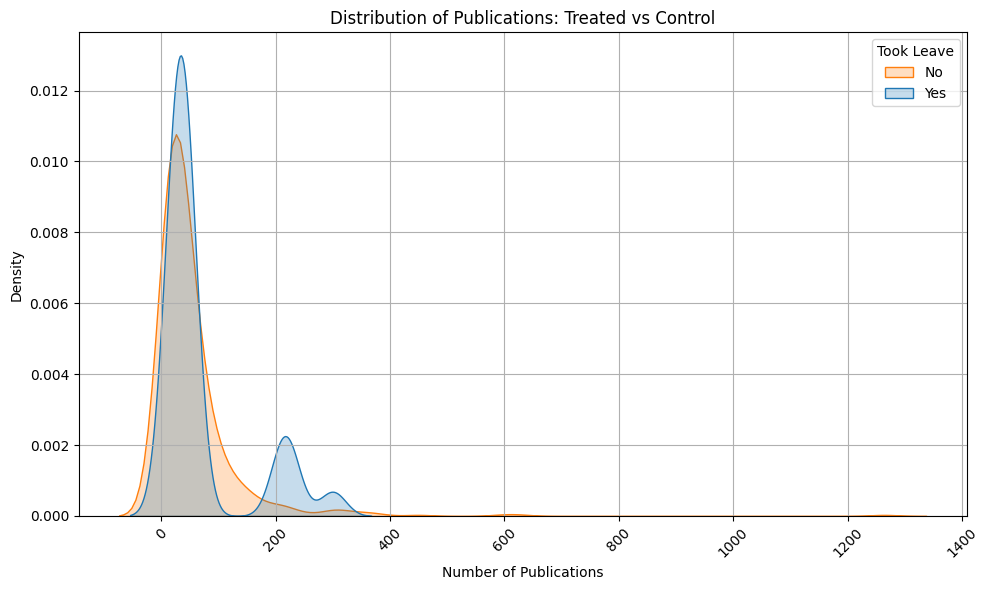

In [507]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data=matched_df, x='NumPublications', hue='TookLeave', fill=True, common_norm=False)
plt.title('Distribution of Publications: Treated vs Control')
plt.xlabel('Number of Publications')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.legend(title='Took Leave', labels=['No', 'Yes'])
plt.grid(True)
plt.tight_layout()
plt.show()


Shows how publication counts are distributed for treated vs. control groups.
Treated curve (leave takers) is shifted left, suggesting fewer publications.
Some high-publication outliers (long tail) are visible in the control group.

Heterogeneity by gender & academic rank

In [497]:
matched_df = matched_df.merge(df_robust[['id', 'GenderIdentity', 'AcademicPosition']], on='id', how='left')


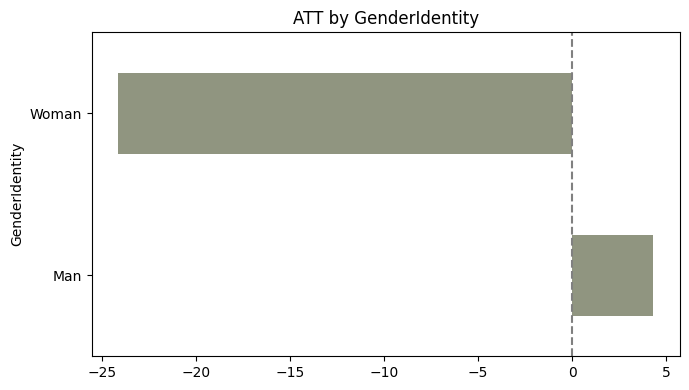

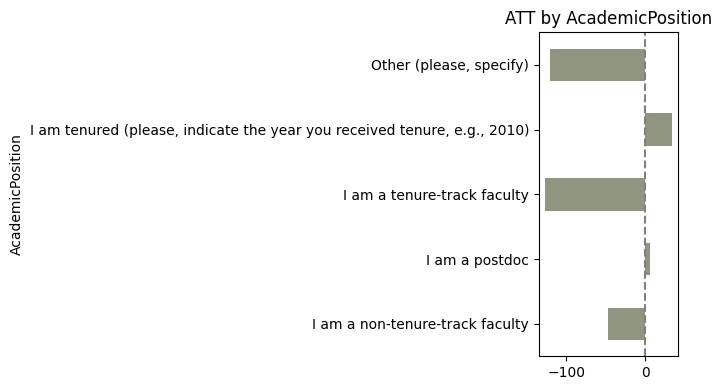

In [502]:
for group in ['GenderIdentity', 'AcademicPosition']:
    subgroup_means = (
        matched_df.groupby(['TookLeave', group])['NumPublications']
        .mean()
        .unstack(0)
        .dropna()
    )
    att = subgroup_means[1] - subgroup_means[0]
    att.plot(kind='barh', color='#909580', title=f'ATT by {group}', figsize=(7, 4))
    plt.axvline(0, color='grey', linestyle='--')
    plt.tight_layout()
    plt.show()



Shows difference in means (treated - control) within each subgroup.
Useful for visualizing heterogeneity in treatment effects.

#### ATT by GenderIdentity  

Women who took leave published ~25 fewer papers on average than similar women who didn’t.
Men who took leave show a small positive ATT — they may have published slightly more than matched men who didn’t take leave (though you’d want to check sample size; might be noisy).
This suggests that leave has a much more negative effect on women’s productivity than men’s — possibly due to unequal caregiving roles, time off, or reentry support.

#### ATT by AcademicPosition  

The effect of leave is most negative for tenure-track faculty and “Other” (which could be precarious or undefined roles).
For tenured faculty, the penalty is smaller — they may have more buffer to absorb leave.
Postdocs and non-tenure-track faculty show varied effects — still negative but not uniformly large.

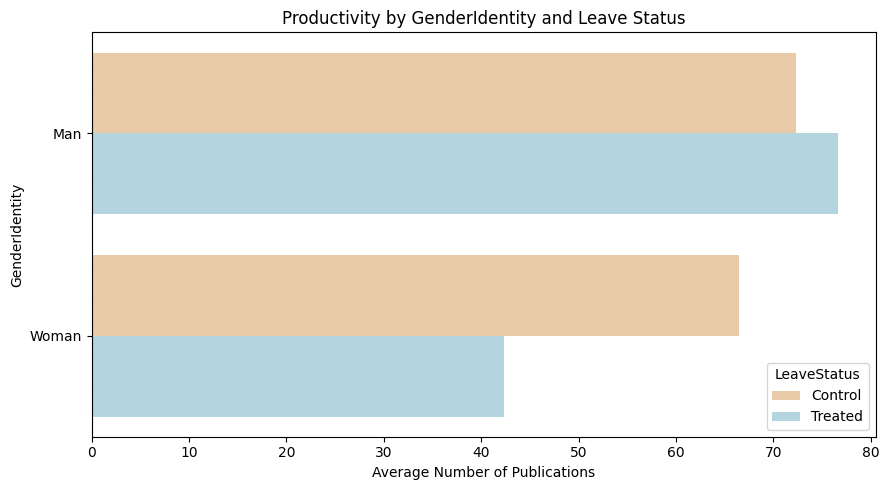

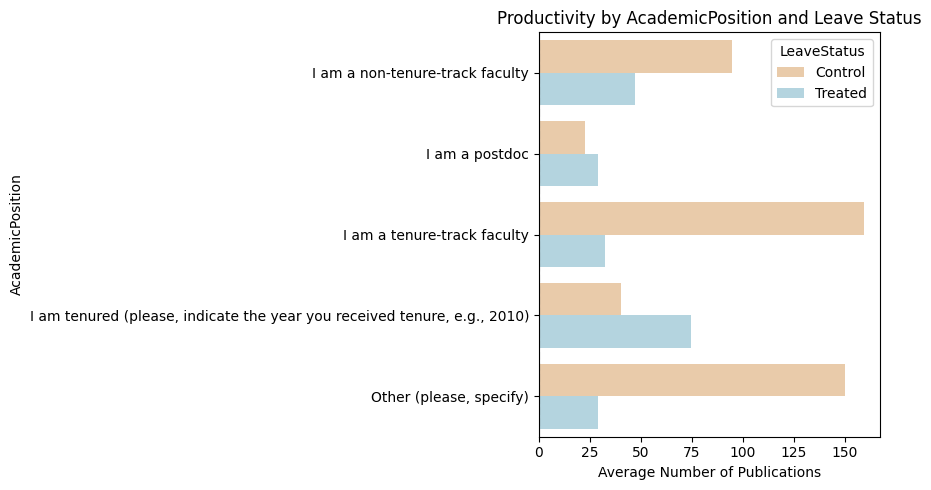

In [508]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {
    'Treated': '#ADD8E6',
    'Control': '#f4cb9f'
}

for group in ['GenderIdentity', 'AcademicPosition']:
    avg_prod = (
        matched_df.groupby([group, 'TookLeave'])['NumPublications']
        .mean()
        .reset_index()
    )
    
    # Convert TookLeave to label for clarity
    avg_prod['LeaveStatus'] = avg_prod['TookLeave'].map({0: 'Control', 1: 'Treated'})

    plt.figure(figsize=(9, 5))
    sns.barplot(
        data=avg_prod,
        x='NumPublications',
        y=group,
        hue='LeaveStatus',
        palette=custom_palette
    )
    plt.title(f'Productivity by {group} and Leave Status')
    plt.xlabel('Average Number of Publications')
    plt.tight_layout()
    plt.axvline(0, color='grey', linestyle='--')
    plt.show()


Shows groupwise means for treated vs. control, side by side.
Same data source as above, but the focus is on the magnitude of productivity, not just the difference.

### Bootstrap

Let's Bootstrap the ATT, this will give me a confidence interval, telling me sth about the stability of my estimate.

In [512]:
n_iterations = 1000
att_samples = []

for _ in range(n_iterations):
    # Sample with replacement from matched_df
    boot_sample = matched_df.sample(n=len(matched_df), replace=True)

    treated = boot_sample[boot_sample['TookLeave'] == 1]['NumPublications']
    control = boot_sample[boot_sample['TookLeave'] == 0]['NumPublications']

    att_boot = treated.mean() - control.mean()
    att_samples.append(att_boot)

# Compute 95% CI
mean_att = np.mean(att_samples)
lower, upper = np.percentile(att_samples, [2.5, 97.5])
print(f"Bootstrapped ATT: {mean_att:.2f} publications")
print(f"Bootstrapped ATT 95% CI: [{lower:.2f}, {upper:.2f}]")

Bootstrapped ATT: -14.65 publications
Bootstrapped ATT 95% CI: [-24.09, -4.74]


Mean ATT ≈ –14.65
This means those who took parental leave published about 14 fewer papers on average than their matched counterparts who didn’t take leave.

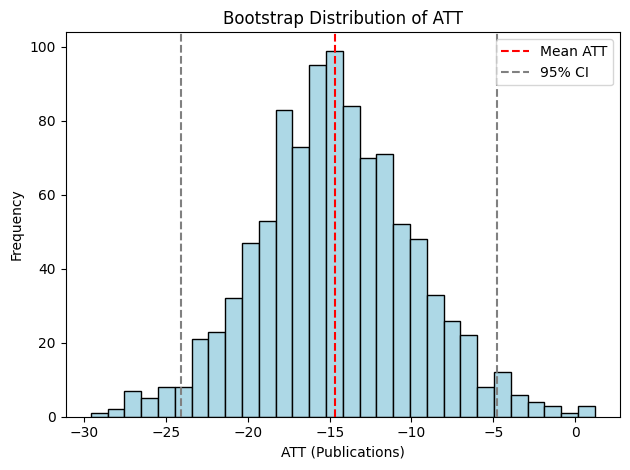

In [513]:
plt.hist(att_samples, bins=30, color='#ADD8E6', edgecolor='black')
plt.axvline(x=np.mean(att_samples), color='red', linestyle='--', label='Mean ATT')
plt.axvline(x=lower, color='grey', linestyle='--', label='95% CI')
plt.axvline(x=upper, color='grey', linestyle='--')
plt.title('Bootstrap Distribution of ATT')
plt.xlabel('ATT (Publications)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [514]:
n_iterations = 50000
att_samples = []

for _ in range(n_iterations):
    # Sample with replacement from matched_df
    boot_sample = matched_df.sample(n=len(matched_df), replace=True)

    treated = boot_sample[boot_sample['TookLeave'] == 1]['NumPublications']
    control = boot_sample[boot_sample['TookLeave'] == 0]['NumPublications']

    att_boot = treated.mean() - control.mean()
    att_samples.append(att_boot)

# Compute 95% CI
mean_att = np.mean(att_samples)
lower, upper = np.percentile(att_samples, [2.5, 97.5])
print(f"Bootstrapped ATT: {mean_att:.2f} publications")
print(f"Bootstrapped ATT 95% CI: [{lower:.2f}, {upper:.2f}]")

Bootstrapped ATT: -14.47 publications
Bootstrapped ATT 95% CI: [-24.05, -4.31]


In [515]:
p_val = np.mean(np.array(att_samples) >= 0)
p_val = min(p_val, 1 - p_val) * 2  # two-sided

print(f"Bootstrap-based p-value: {p_val:.4f}")


Bootstrap-based p-value: 0.0064


Mean ATT: –14.47
→ On average, faculty who took parental leave published ~14.5 fewer papers than matched peers who did not take leave.
95% Confidence Interval: [–24.05, –4.31]
→ We are 95% confident that the true effect lies between a reduction of 24 and 4 publications.
→ Zero is not in this range → this effect is statistically significant.
Bootstrap-based p-value: 0.0064
→ This is less than 0.01, meaning the result is significant at the 1% level.
→ It’s unlikely (less than 1% chance) that such a large difference occurred due to random sampling variation, if the true effect were zero.

Stratified Bootstrap by gender and position

This helps assess whether the effect of parental leave is stronger for certain subgroups — e.g., more negative for tenure-track women.

In [516]:
# Define subgroups to stratify by
subgroups = ['GenderIdentity', 'AcademicPosition']
n_iterations = 5000  # Use fewer iterations for speed (adjust as needed)

for group in subgroups:
    print(f"\nStratified bootstrap ATT by {group}")
    for level in matched_df[group].dropna().unique():
        subgroup_df = matched_df[matched_df[group] == level]

        if subgroup_df['TookLeave'].nunique() < 2:
            print(f"  Skipping {level}: not enough variation in treatment.")
            continue

        att_samples = []
        for _ in range(n_iterations):
            boot_sample = subgroup_df.sample(n=len(subgroup_df), replace=True)
            treated = boot_sample[boot_sample['TookLeave'] == 1]['NumPublications']
            control = boot_sample[boot_sample['TookLeave'] == 0]['NumPublications']
            att_boot = treated.mean() - control.mean()
            att_samples.append(att_boot)

        mean_att = np.mean(att_samples)
        lower, upper = np.percentile(att_samples, [2.5, 97.5])
        p_val = np.mean(np.array(att_samples) >= 0)
        p_val = min(p_val, 1 - p_val) * 2

        print(f"  {level}: ATT = {mean_att:.2f}, 95% CI = [{lower:.2f}, {upper:.2f}], p = {p_val:.4f}")



Stratified bootstrap ATT by GenderIdentity
  Man: ATT = 4.28, 95% CI = [-17.86, 28.30], p = 0.7348
  Woman: ATT = -24.05, 95% CI = [-33.42, -14.75], p = 0.0000

Stratified bootstrap ATT by AcademicPosition
  I am tenured (please, indicate the year you received tenure, e.g., 2010): ATT = 34.23, 95% CI = [24.54, 44.59], p = 0.0000
  I am a postdoc: ATT = 6.41, 95% CI = [-4.47, 23.44], p = 0.4340
  I am a non-tenure-track faculty: ATT = -47.69, 95% CI = [-85.73, -2.46], p = 0.0388
  I am a tenure-track faculty: ATT = -127.02, 95% CI = [-148.10, -105.43], p = 0.0000
  Other (please, specify): ATT = -121.10, 95% CI = [-148.96, -92.26], p = 0.0000


men:    No significant effect. Wide CI includes 0 → we can't reject the null. For men, leave does not appear to reduce productivity on average. Strong, statistically significant negative effect. 

women:  Women who took leave published ~24 fewer papers on average than matched women who didn’t.  

Conclusion: 

The negative effect is concentrated entirely among women. F
or men, the distribution overlaps with zero — there’s no significant penalty.

tenured:            Surprising: Leave is associated with higher productivity — possibly reverse causality (e.g., highly productive scholars more likely to take leave and bounce back)
postdoc:            Not statistically significant.
non-tenure-track:   Moderately strong negative effect.
tenure track:       Extremely strong and significant productivity loss. Possibly due to the career-critical stage.
Other:              Also severely impacted, though group composition may be heterogeneous.

Conclusion:     

Tenure-track faculty are hit hardest by leave (~127 publications lost).  
Tenured faculty see no harm — perhaps even benefits.  
Postdocs and others show varied results, some borderline or not significant.